# RNN & LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d_train = pd.read_csv('BTC-USD.csv') 
print d_train.head()
print d_train.shape

         Date     Open     High      Low    Close  Adj Close  Volume
0  2010-07-16  0.04951  0.04951  0.04951  0.04951    0.04951       0
1  2010-07-17  0.04951  0.08585  0.05941  0.08584    0.08584       5
2  2010-07-18  0.08584  0.09307  0.07723  0.08080    0.08080      49
3  2010-07-19  0.08080  0.08181  0.07426  0.07474    0.07474      20
4  2010-07-20  0.07474  0.07921  0.06634  0.07921    0.07921      42
(2765, 7)


In [7]:
d_open = d_train['Open']
print d_open.head()

0    0.04951
1    0.04951
2    0.08584
3    0.08080
4    0.07474
Name: Open, dtype: float64


In [8]:
d_open = d_open.values ## convert to ndarray


In [16]:
print type(d_open)
print d_open.shape
d_open = d_open.reshape(-1, 1)
print d_open.shape

<type 'numpy.ndarray'>
(2765,)
(2765, 1)


In [17]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
d_open = scaler.fit_transform(d_open)

In [20]:
xtrain = d_open[:-1]
xtrain.shape

(2764, 1)

In [28]:
ytrain = d_open[1:]
ytrain.shape

(2764, 1)

In [34]:
xtrain[1]

array([ 0.])

In [35]:
ytrain[0]

array([ 0.])

In [36]:
xtrain = xtrain.reshape(xtrain.shape[0], 1, 1)     #Reshaping into required shape for Keras
print xtrain.shape

(2764, 1, 1)


In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [53]:
regressor=Sequential() 
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))      #adding input layerand the LSTM layer
regressor.add(Dense(units=1))                                               #adding output layers
regressor.compile(optimizer='adam',loss='mean_squared_error')               #compiling the RNN
regressor.fit(xtrain,ytrain,batch_size=32,epochs=350,verbose=0)                      #fitting the RNN to the training set 

In [41]:
# Reading CSV file into test set
d_test = pd.read_csv('BTCtest.csv')
print d_test.head()
print d_test.shape

         Date          Open          High           Low         Close  \
0  2017-12-01   9947.080078  10942.799805   9420.929688  10861.469727   
1  2017-12-02  10861.469727  11175.230469  10715.549805  10912.730469   
2  2017-12-03  10912.719727  11851.089844  10578.429688  11246.209961   
3  2017-12-04  11244.200195  11624.629883  10917.809570  11623.910156   
4  2017-12-05  11624.370117  11901.870117  11486.129883  11667.129883   

      Adj Close      Volume  
0  10861.469727  1353669597  
1  10912.730469   950474241  
2  11246.209961  1380012064  
3  11623.910156  1057859226  
4  11667.129883  1048839303  
(8, 7)


In [43]:
actual_open = d_test['Open'].values.reshape(-1,1)

In [44]:
#getting the predicted BTC value of the first week of Dec 2017  
inputs = actual_open
inputs = scaler.transform(inputs)

In [45]:
inputs = inputs.reshape(inputs.shape[0], 1, 1)     #Reshaping into required shape for Keras
print inputs.shape

(8, 1, 1)


In [49]:
predict_open = regressor.predict(inputs)
predict_open = scaler.inverse_transform(predict_open)

In [48]:
print actual_open.shape
print predict_open.shape

(8, 1)
(8, 1)


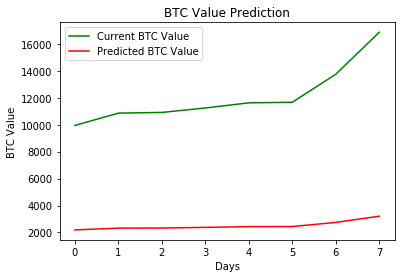

In [50]:
plt.plot(actual_open, color = 'green', label = 'Current BTC Value')
plt.plot(predict_open, color = 'red', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()
